In [7]:
import pandas as pd
import numpy as np 

df = pd.read_csv('finance_data.csv')

df['emotions'] = df['emotions'].apply(eval)
df['emotion_scores'] = df['emotion_scores'].apply(eval)
for emotion in df['emotions'].iloc[0]:
    df[emotion] = df.apply(lambda row: row['emotion_scores'][row['emotions'].index(emotion)], axis=1)
df['dominant_emotion'] = df.apply(lambda row: row['emotions'][row['emotion_scores'].index(max(row['emotion_scores']))], axis=1)
print(df[['dominant_emotion']])


    dominant_emotion
0           Optimism
1            Concern
2         Excitement
3         Excitement
4            Concern
..               ...
698          Concern
699       Excitement
700          Concern
701       Excitement
702          Concern

[703 rows x 1 columns]


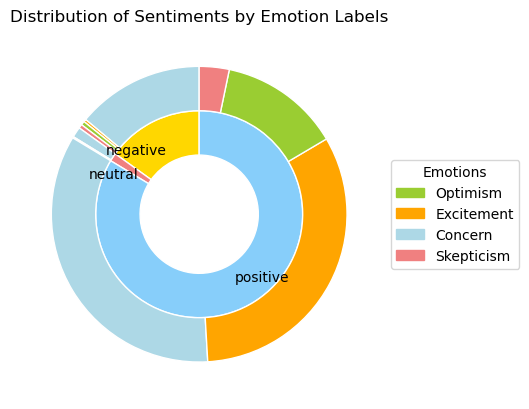

In [5]:
import matplotlib.pyplot as plt
import pandas as pd


sentiment_counts = df['sentiment'].value_counts().sort_index()

emotion_counts = df.groupby(['sentiment', 'dominant_emotion']).size()

sentiment_colors = ['gold', 'lightcoral', 'lightskyblue']

emotion_color_map = {
    'Optimism': 'yellowgreen',
    'Excitement': 'orange',
    'Concern': 'lightblue',
    'Skepticism': 'lightcoral',
}

sizes_inner = sentiment_counts.values
labels_inner = sentiment_counts.index

sizes_outer = []
labels_outer = []
colors_outer = []

total_responses = df.shape[0]

for sentiment in labels_inner:
    sentiment_emotions = emotion_counts[sentiment].sort_index()
    for emotion in sentiment_emotions.index:
        emotion_count = sentiment_emotions[emotion]
        size = emotion_count / total_responses
        sizes_outer.append(size)
        labels_outer.append(emotion)
        colors_outer.append(emotion_color_map[emotion])

fig, ax = plt.subplots()
inner_pie = ax.pie(sizes_inner, radius=0.7, colors=sentiment_colors, labels=labels_inner, labeldistance=0.7,
                   wedgeprops=dict(width=0.3, edgecolor='w'), startangle=90)
outer_pie = ax.pie(sizes_outer, radius=1, colors=colors_outer, wedgeprops=dict(width=0.3, edgecolor='w'), startangle=90)

emotion_labels = list(emotion_color_map.keys())
handles = [plt.Rectangle((0, 0), 1, 1, color=emotion_color_map[label]) for label in emotion_labels]
ax.legend(handles, emotion_labels, title="Emotions", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

for txt in outer_pie[1]:
    txt.set_visible(False)
ax.set_title('Distribution of Sentiments by Emotion Labels')
plt.savefig('finance_chart.jpg')
plt.show()


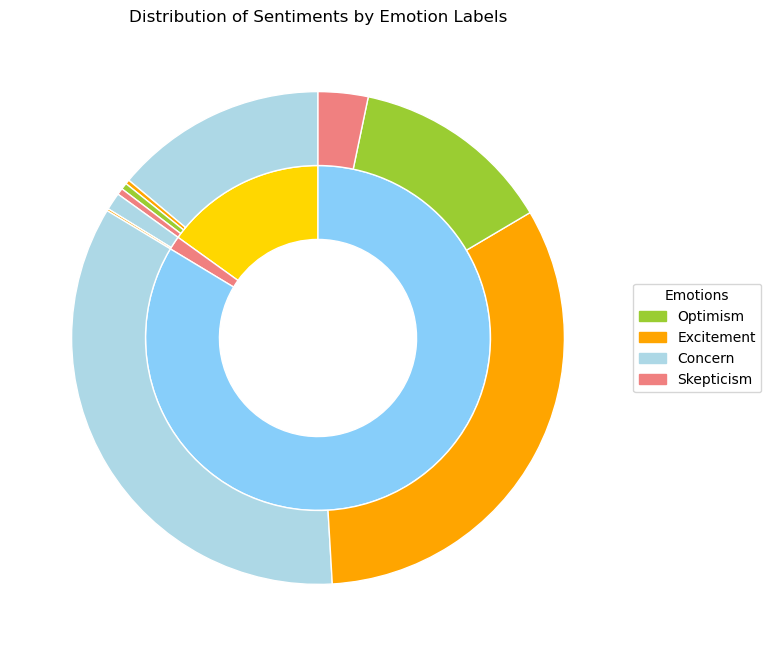

In [12]:
import matplotlib.pyplot as plt
import pandas as pd


sentiment_counts = df['sentiment'].value_counts().sort_index()

emotion_counts = df.groupby(['sentiment', 'dominant_emotion']).size()

sentiment_colors = ['gold', 'lightcoral', 'lightskyblue']

emotion_color_map = {
    'Optimism': 'yellowgreen',
    'Excitement': 'orange',
    'Concern': 'lightblue',
    'Skepticism': 'lightcoral',
}

sizes_inner = sentiment_counts.values
labels_inner = sentiment_counts.index

sizes_outer = []
labels_outer = []
colors_outer = []

total_responses = df.shape[0]

for sentiment in labels_inner:
    sentiment_emotions = emotion_counts[sentiment].sort_index()
    for emotion in sentiment_emotions.index:
        emotion_count = sentiment_emotions[emotion]
        size = emotion_count / total_responses
        sizes_outer.append(size)
        labels_outer.append(emotion)
        colors_outer.append(emotion_color_map[emotion])

fig, ax = plt.subplots(figsize=(10, 8))  # Adjust the width and height as needed
inner_pie = ax.pie(sizes_inner, radius=0.7, colors=sentiment_colors,
                   wedgeprops=dict(width=0.3, edgecolor='w'), startangle=90)
outer_pie = ax.pie(sizes_outer, radius=1, colors=colors_outer, wedgeprops=dict(width=0.3, edgecolor='w'), startangle=90)

emotion_labels = list(emotion_color_map.keys())
handles = [plt.Rectangle((0, 0), 1, 1, color=emotion_color_map[label]) for label in emotion_labels]
ax.legend(handles, emotion_labels, title="Emotions", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

for txt in outer_pie[1]:
    txt.set_visible(False)
ax.set_title('Distribution of Sentiments by Emotion Labels')
plt.savefig('finance_chart.jpg', dpi=300)  
plt.show()


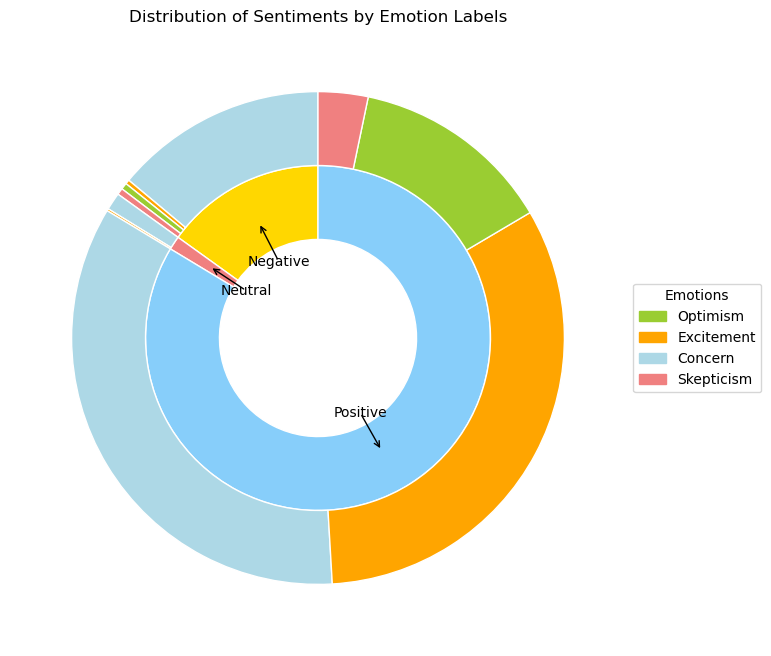

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np  

sentiment_counts = df['sentiment'].value_counts().sort_index()
emotion_counts = df.groupby(['sentiment', 'dominant_emotion']).size()
sentiment_colors = ['gold', 'lightcoral', 'lightskyblue']
emotion_color_map = {
    'Optimism': 'yellowgreen',
    'Excitement': 'orange',
    'Concern': 'lightblue',
    'Skepticism': 'lightcoral',
}

sizes_inner = sentiment_counts.values
labels_inner = sentiment_counts.index
sizes_outer = []
labels_outer = []
colors_outer = []
total_responses = df.shape[0]

for sentiment in labels_inner:
    sentiment_emotions = emotion_counts[sentiment].sort_index()
    for emotion in sentiment_emotions.index:
        emotion_count = sentiment_emotions[emotion]
        size = emotion_count / total_responses
        sizes_outer.append(size)
        labels_outer.append(emotion)
        colors_outer.append(emotion_color_map[emotion])

fig, ax = plt.subplots(figsize=(10, 8))
inner_pie = ax.pie(sizes_inner, radius=0.7, colors=sentiment_colors, wedgeprops=dict(width=0.3, edgecolor='w'), startangle=90)
outer_pie = ax.pie(sizes_outer, radius=1, colors=colors_outer, wedgeprops=dict(width=0.3, edgecolor='w'), startangle=90)

emotion_labels = list(emotion_color_map.keys())
handles = [plt.Rectangle((0, 0), 1, 1, color=emotion_color_map[label]) for label in emotion_labels]
ax.legend(handles, emotion_labels, title="Emotions", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

for txt in outer_pie[1]:
    txt.set_visible(False)

for i, (size, label) in enumerate(zip(sizes_inner, labels_inner)):
    ang = (inner_pie[0][i].theta2 - inner_pie[0][i].theta1) / 2. + inner_pie[0][i].theta1
    x = 0.35 * np.cos(np.deg2rad(ang))
    y = 0.35 * np.sin(np.deg2rad(ang))
    label_capitalized = label.capitalize()  # Capitalize the first letter of the label
    ax.text(x, y, label_capitalized, ha='center', va='center')  # Use the capitalized label here
    ax.annotate('',
                xy=(0.525 * np.cos(np.deg2rad(ang)), 0.525 * np.sin(np.deg2rad(ang)),),
                xycoords='data',
                xytext=(x, y), textcoords='data',
                arrowprops=dict(arrowstyle="->", connectionstyle="arc3")
                )

ax.set_title('Distribution of Sentiments by Emotion Labels')
plt.savefig('finance_chart.jpg', dpi=300)
plt.show()
